In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [11]:
cumulative_player_stats_df = Local.get_cumulative_player_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [5]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [6]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [7]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [8]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [9]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [10]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [11]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [6]:
games_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
16157,2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0
16156,2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0
16155,2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0
16154,2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0
16153,2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0
3,2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0
2,2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0
1,2020-12-19,12000048,1610612764,1610612765,2020,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0


In [7]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,...,PPG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home
0,2003-10-05,10300001,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
1,2003-10-06,10300002,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
2,2003-10-07,10300009,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
3,2003-10-07,10300005,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
4,2003-10-07,10300007,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,2,1,111.500000,0.443500,0.353000,0.691000,...,92.000000,0.427000,0.283000,0.818000,26.000000,35.000000,1.610613e+09,1.610613e+09,0.000000,1.000000
23516,2020-12-18,12000039,1,2020,2,1,105.000000,0.438000,0.383000,0.619000,...,108.000000,0.471000,0.241000,0.750000,23.000000,42.000000,1.610613e+09,1.610613e+09,1.000000,0.000000
23517,2020-12-19,12000049,1,2020,3,3,119.333333,0.466667,0.329333,0.704667,...,111.333333,0.392667,0.332333,0.789667,24.000000,56.000000,1.610613e+09,1.610613e+09,0.333333,1.000000
23518,2020-12-19,12000048,1,2020,2,3,100.000000,0.415000,0.321500,0.704500,...,93.333333,0.413333,0.333000,0.713000,20.000000,41.666667,1.610613e+09,1.610613e+09,0.666667,0.000000


## Attach PCA of Player Stats Column

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING', np.nan)

In [12]:
for i, row in cumulative_stats_df.iterrows():
    team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_home'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    if len(team_player_stats)==0:
        continue
    pca_1 = PCA(n_components=1)
    reduced_team_player_stats = pd.DataFrame(pca_1.fit_transform(team_player_stats))
    cumulative_stats_df['PLAYER_RANKING'].iat[i] = reduced_team_player_stats.mean()
    if i%5000==0:
        print(i)

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_pca.py:461: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


5000
10000
15000
20000


In [13]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,...,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home,PLAYER_RANKING
0,2003-10-05,10300001,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
1,2003-10-06,10300002,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
2,2003-10-07,10300009,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
3,2003-10-07,10300005,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
4,2003-10-07,10300007,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,2,1,111.500000,0.443500,0.353000,0.691000,...,0.427000,0.283000,0.818000,26.000000,35.000000,1.610613e+09,1.610613e+09,0.000000,1.000000,5.921189e-16
23516,2020-12-18,12000039,1,2020,2,1,105.000000,0.438000,0.383000,0.619000,...,0.471000,0.241000,0.750000,23.000000,42.000000,1.610613e+09,1.610613e+09,1.000000,0.000000,-3.330669e-16
23517,2020-12-19,12000049,1,2020,3,3,119.333333,0.466667,0.329333,0.704667,...,0.392667,0.332333,0.789667,24.000000,56.000000,1.610613e+09,1.610613e+09,0.333333,1.000000,0.000000e+00
23518,2020-12-19,12000048,1,2020,2,3,100.000000,0.415000,0.321500,0.704500,...,0.413333,0.333000,0.713000,20.000000,41.666667,1.610613e+09,1.610613e+09,0.666667,0.000000,-4.440892e-16


## Attach target columns to dataset

In [16]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [17]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)].dropna()

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [18]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,APG_total_home,RPG_total_home,PPG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,W_PCT_away,W_PCT_home,PLAYER_RANKING
114,79.000000,0.329000,0.143000,0.897000,7.000000,44.000000,86.000000,0.352000,0.222000,0.647000,15.000000,55.000000,1.000000,0.000000,-8.881784e-17
117,100.000000,0.442000,0.365000,0.650000,20.500000,38.500000,62.000000,0.385000,0.300000,0.576000,11.000000,30.000000,1.000000,0.500000,0.000000e+00
118,90.000000,0.457000,0.143000,0.735000,23.000000,41.000000,104.000000,0.527000,0.429000,0.657000,22.000000,33.000000,1.000000,1.000000,-2.590520e-16
119,105.000000,0.527000,0.700000,0.714000,27.000000,39.000000,80.000000,0.350000,0.429000,0.750000,18.000000,45.000000,0.000000,1.000000,9.868649e-17
120,76.000000,0.383000,0.200000,0.750000,17.000000,39.000000,101.000000,0.464000,0.250000,0.679000,22.000000,47.000000,1.000000,1.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,111.500000,0.443500,0.353000,0.691000,25.000000,41.500000,92.000000,0.427000,0.283000,0.818000,26.000000,35.000000,0.000000,1.000000,5.921189e-16
23516,105.000000,0.438000,0.383000,0.619000,26.000000,35.500000,108.000000,0.471000,0.241000,0.750000,23.000000,42.000000,1.000000,0.000000,-3.330669e-16
23517,119.333333,0.466667,0.329333,0.704667,30.666667,52.666667,111.333333,0.392667,0.332333,0.789667,24.000000,56.000000,0.333333,1.000000,0.000000e+00
23518,100.000000,0.415000,0.321500,0.704500,22.000000,44.500000,93.333333,0.413333,0.333000,0.713000,20.000000,41.666667,0.666667,0.000000,-4.440892e-16


## Train test split

In [19]:
from imblearn.combine import SMOTEENN

In [20]:
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    X_train_dict[key], X_test_dict[key], y_train_dict[key], y_test_dict[key] = train_test_split(
        X_over,
        y_over,
        train_size=0.8,
        random_state=0,
    )

## Do hyperparameters searches

In [21]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [22]:
RandomForestClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y)
    return clf

## Plot feature importances

In [24]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

## Train Random Forest Without Pruning

In [25]:
from sklearn.metrics import classification_report

In [26]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, grid_cv_params):
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        print('Best Random Forest accuracy (%s): %.2f' % (str(cv_clf.best_params_), cv_clf.score(X_test_dict[key], y_test_dict[key])))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       849
         1.0       0.57      0.51      0.54       516

    accuracy                           0.67      1365
   macro avg       0.65      0.64      0.64      1365
weighted avg       0.66      0.67      0.67      1365



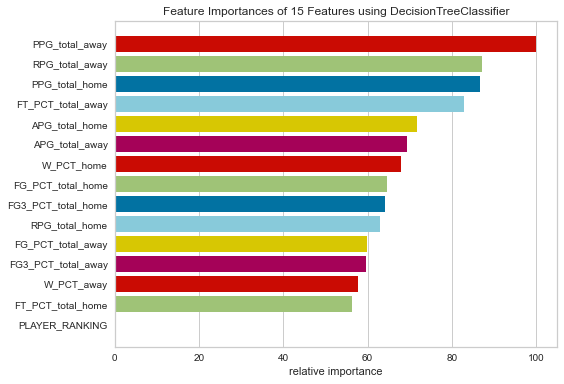

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       589
         1.0       0.54      0.51      0.53       402

    accuracy                           0.63       991
   macro avg       0.61      0.61      0.61       991
weighted avg       0.62      0.63      0.62       991



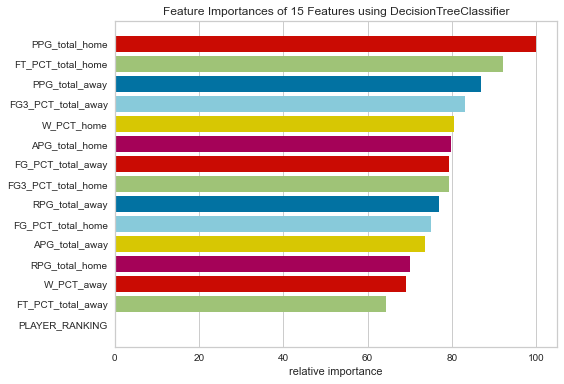

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60       337
         1.0       0.54      0.57      0.56       287

    accuracy                           0.58       624
   macro avg       0.58      0.58      0.58       624
weighted avg       0.59      0.58      0.58       624



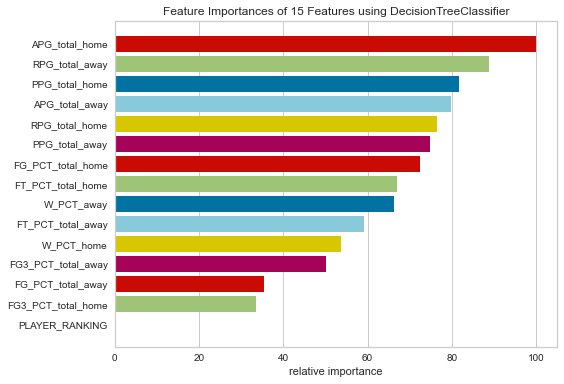

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       325
         1.0       0.56      0.59      0.57       304

    accuracy                           0.58       629
   macro avg       0.58      0.58      0.58       629
weighted avg       0.58      0.58      0.58       629



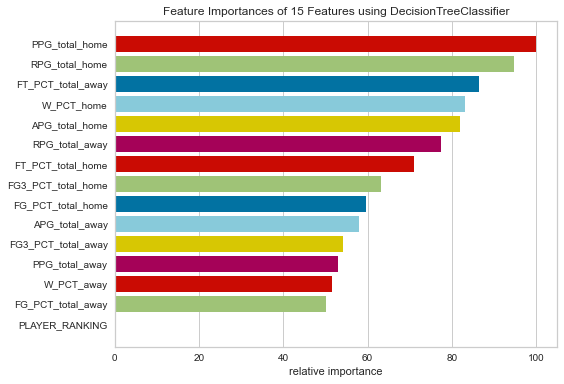

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68       585
         1.0       0.52      0.53      0.53       391

    accuracy                           0.61       976
   macro avg       0.60      0.60      0.60       976
weighted avg       0.62      0.61      0.62       976



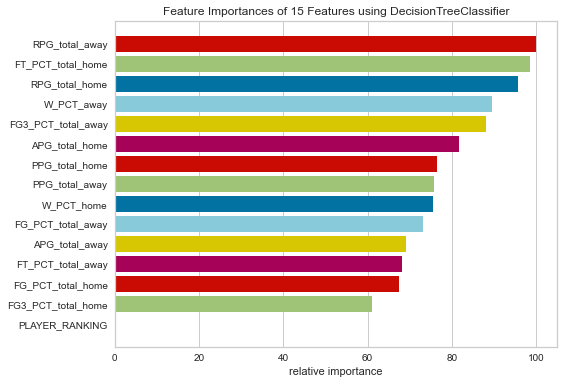

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       465
         1.0       0.55      0.52      0.54       367

    accuracy                           0.60       832
   macro avg       0.60      0.59      0.59       832
weighted avg       0.60      0.60      0.60       832



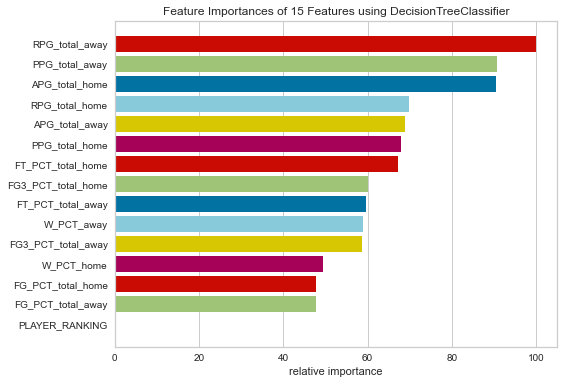

---------------------------------------------


In [34]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {'criterion': ['gini', 'entropy'],},
)

In [26]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

WINNER:

Best decision tree accuracy ({'max_depth': 991, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       849
         1.0       0.57      0.51      0.54       516

    accuracy                           0.67      1365
   macro avg       0.65      0.64      0.64      1365
weighted avg       0.66      0.67      0.67      1365



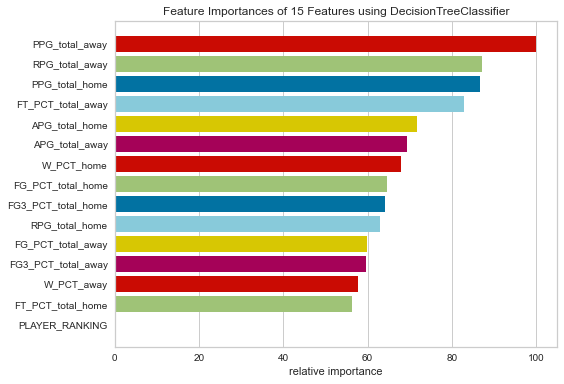

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_depth': 876, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       589
         1.0       0.54      0.51      0.53       402

    accuracy                           0.63       991
   macro avg       0.61      0.61      0.61       991
weighted avg       0.62      0.63      0.62       991



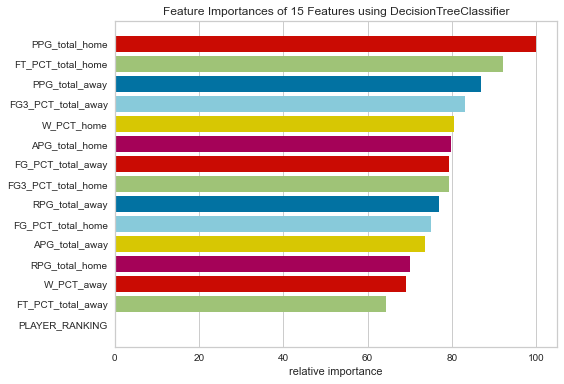

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_depth': 1092, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60       337
         1.0       0.54      0.57      0.56       287

    accuracy                           0.58       624
   macro avg       0.58      0.58      0.58       624
weighted avg       0.59      0.58      0.58       624



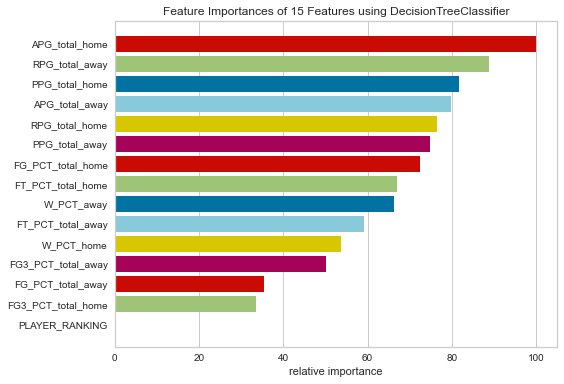

---------------------------------------------
FT:

Best decision tree accuracy ({'max_depth': 240, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       325
         1.0       0.56      0.59      0.57       304

    accuracy                           0.58       629
   macro avg       0.58      0.58      0.58       629
weighted avg       0.58      0.58      0.58       629



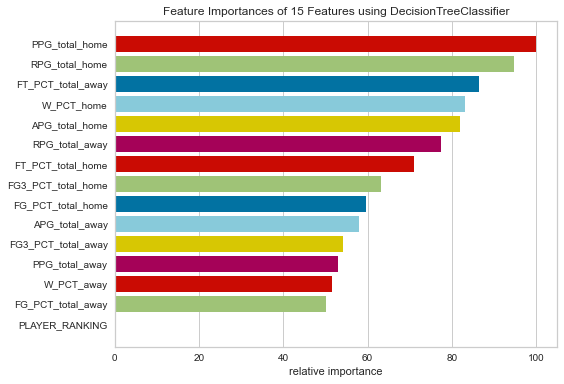

---------------------------------------------
AST:

Best decision tree accuracy ({'max_depth': 1948, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68       585
         1.0       0.52      0.53      0.53       391

    accuracy                           0.61       976
   macro avg       0.60      0.60      0.60       976
weighted avg       0.62      0.61      0.62       976



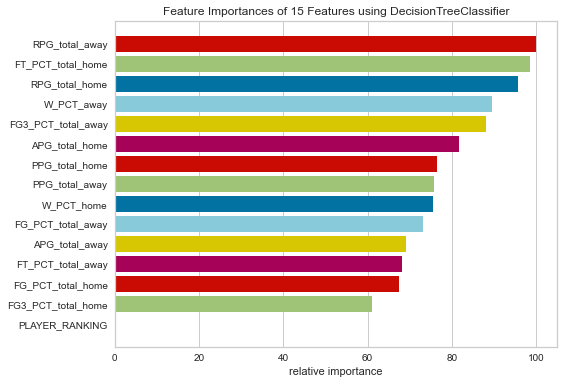

---------------------------------------------
REB:

Best decision tree accuracy ({'max_depth': 428, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       465
         1.0       0.55      0.52      0.54       367

    accuracy                           0.60       832
   macro avg       0.60      0.59      0.59       832
weighted avg       0.60      0.60      0.60       832



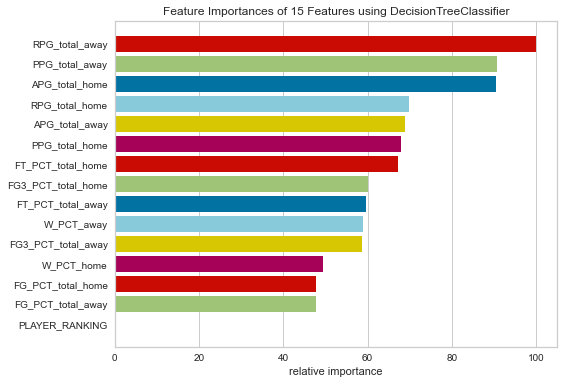

---------------------------------------------


In [36]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,1000)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune impurity decrease

In [28]:
print('Any non-zero min_impurity_decrease causes all classifications to be 1')

Any non-zero min_impurity_decrease causes all classifications to be 1


## Try prune max leaves

WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1178, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.74       849
         1.0       0.55      0.48      0.52       516

    accuracy                           0.66      1365
   macro avg       0.63      0.62      0.63      1365
weighted avg       0.65      0.66      0.65      1365



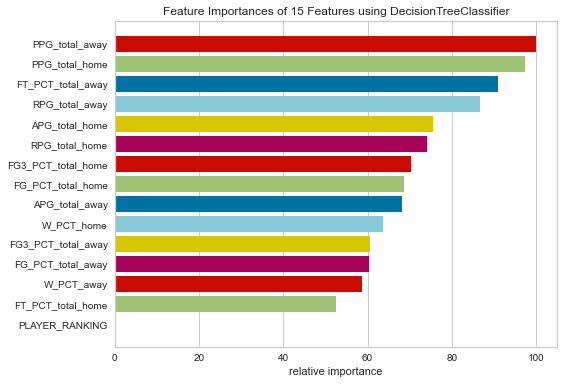

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 542, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       589
         1.0       0.55      0.50      0.52       402

    accuracy                           0.63       991
   macro avg       0.61      0.61      0.61       991
weighted avg       0.63      0.63      0.63       991



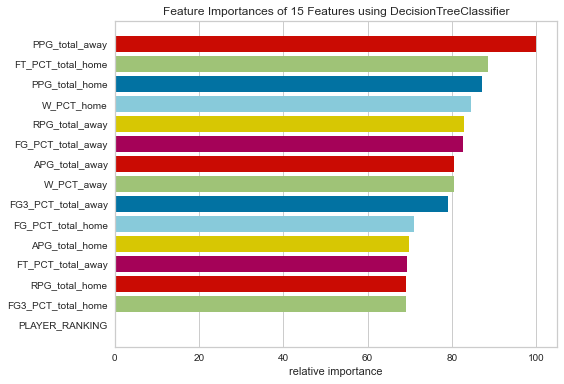

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 104, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

         0.0       0.60      0.66      0.62       337
         1.0       0.54      0.48      0.51       287

    accuracy                           0.57       624
   macro avg       0.57      0.57      0.57       624
weighted avg       0.57      0.57      0.57       624



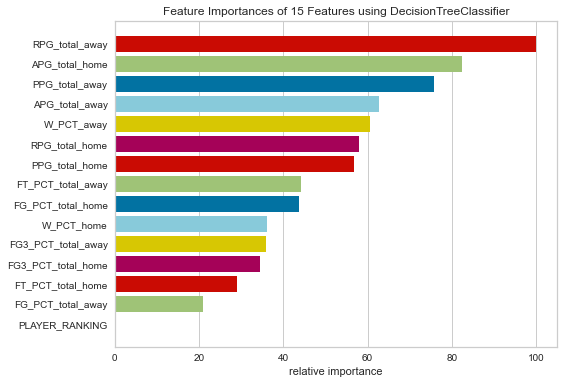

---------------------------------------------
FT:

Best decision tree accuracy ({'max_leaf_nodes': 312, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58       325
         1.0       0.56      0.57      0.56       304

    accuracy                           0.57       629
   macro avg       0.57      0.57      0.57       629
weighted avg       0.57      0.57      0.57       629



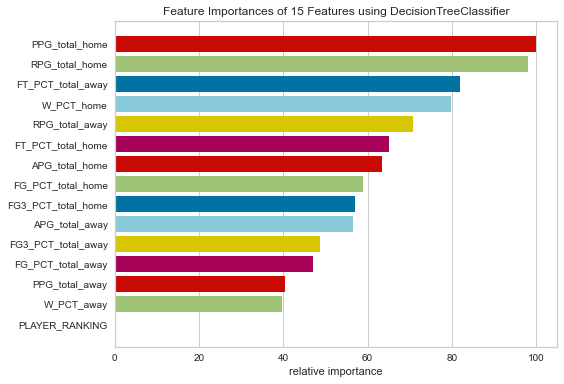

---------------------------------------------
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1580, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       585
         1.0       0.52      0.52      0.52       391

    accuracy                           0.62       976
   macro avg       0.60      0.60      0.60       976
weighted avg       0.62      0.62      0.62       976



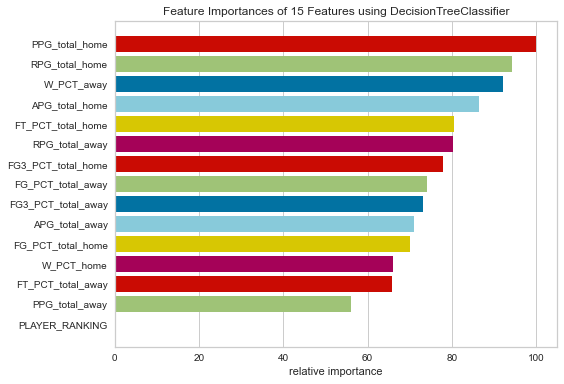

---------------------------------------------
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1504, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65       465
         1.0       0.56      0.55      0.55       367

    accuracy                           0.61       832
   macro avg       0.60      0.60      0.60       832
weighted avg       0.61      0.61      0.61       832



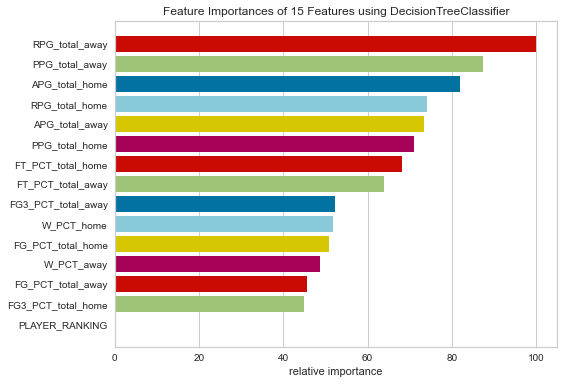

---------------------------------------------


In [29]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(4,2000,2)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune max features

WINNER:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73       849
         1.0       0.55      0.48      0.51       516

    accuracy                           0.65      1365
   macro avg       0.63      0.62      0.62      1365
weighted avg       0.65      0.65      0.65      1365



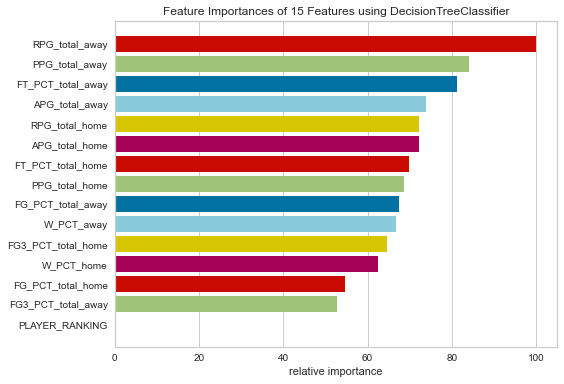

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       589
         1.0       0.55      0.51      0.53       402

    accuracy                           0.63       991
   macro avg       0.62      0.61      0.62       991
weighted avg       0.63      0.63      0.63       991



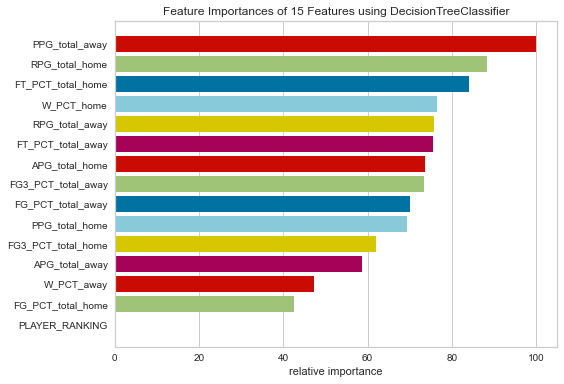

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.60       337
         1.0       0.54      0.57      0.56       287

    accuracy                           0.58       624
   macro avg       0.58      0.58      0.58       624
weighted avg       0.58      0.58      0.58       624



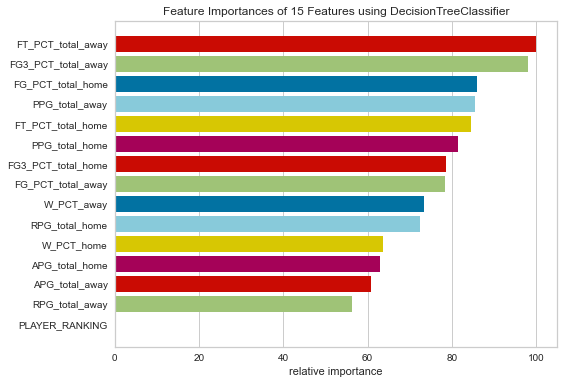

---------------------------------------------
FT:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

         0.0       0.58      0.53      0.55       325
         1.0       0.54      0.59      0.56       304

    accuracy                           0.56       629
   macro avg       0.56      0.56      0.56       629
weighted avg       0.56      0.56      0.56       629



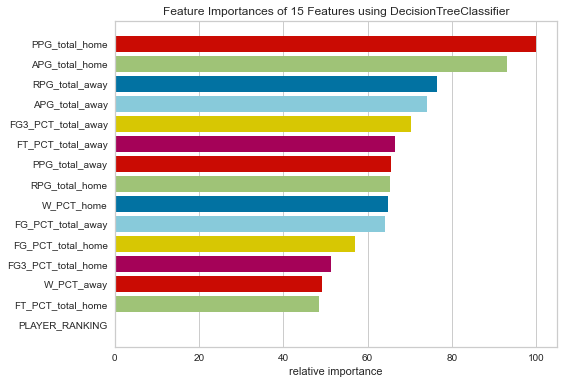

---------------------------------------------
AST:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       585
         1.0       0.53      0.55      0.54       391

    accuracy                           0.62       976
   macro avg       0.61      0.61      0.61       976
weighted avg       0.62      0.62      0.62       976



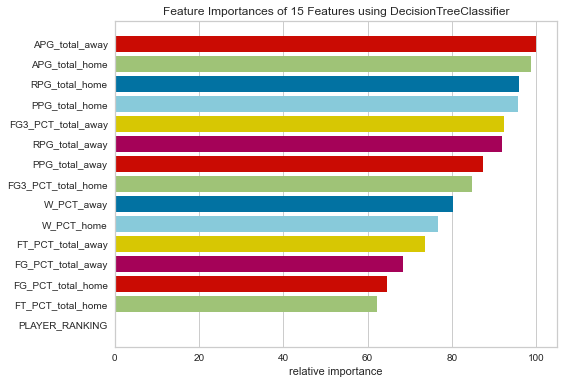

---------------------------------------------
REB:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63       465
         1.0       0.52      0.51      0.52       367

    accuracy                           0.58       832
   macro avg       0.57      0.57      0.57       832
weighted avg       0.58      0.58      0.58       832



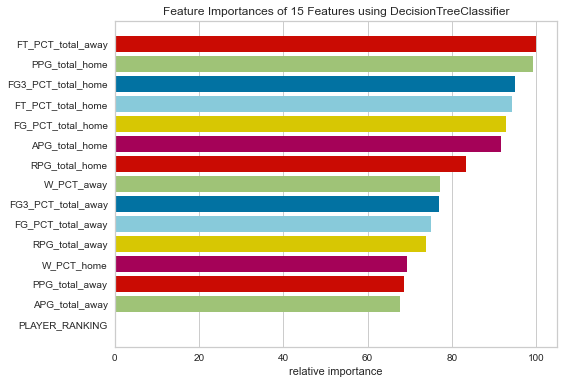

---------------------------------------------


In [30]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
    },
)

## Try class weight balance

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       849
         1.0       0.53      0.45      0.49       516

    accuracy                           0.64      1365
   macro avg       0.61      0.60      0.61      1365
weighted avg       0.63      0.64      0.64      1365



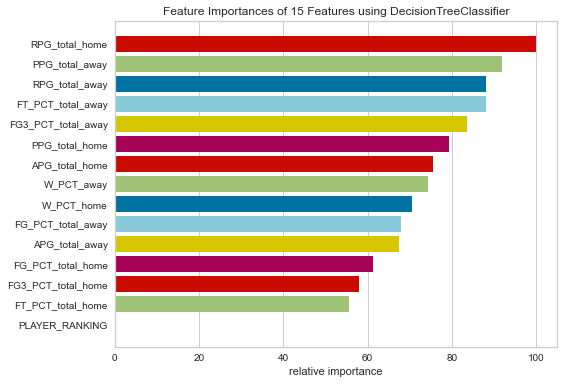

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       589
         1.0       0.54      0.51      0.53       402

    accuracy                           0.63       991
   macro avg       0.61      0.61      0.61       991
weighted avg       0.62      0.63      0.62       991



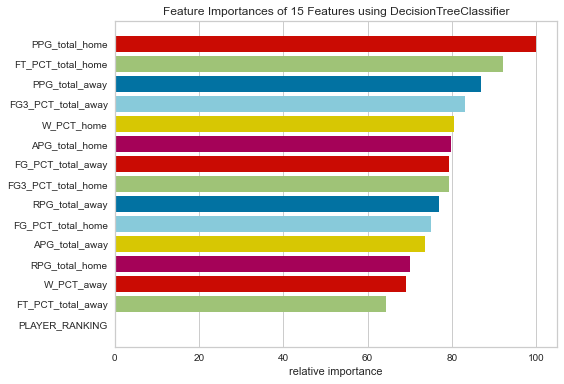

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.61       337
         1.0       0.54      0.57      0.56       287

    accuracy                           0.58       624
   macro avg       0.58      0.58      0.58       624
weighted avg       0.59      0.58      0.58       624



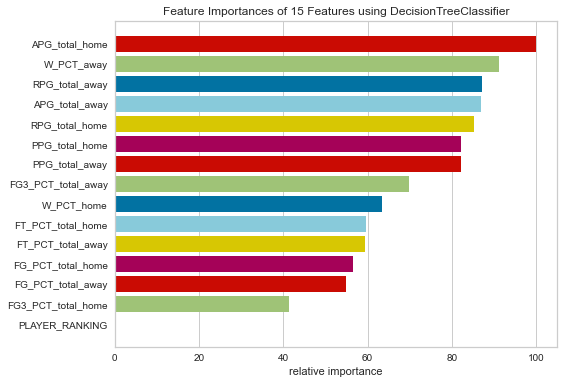

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59       325
         1.0       0.57      0.59      0.58       304

    accuracy                           0.59       629
   macro avg       0.59      0.59      0.59       629
weighted avg       0.59      0.59      0.59       629



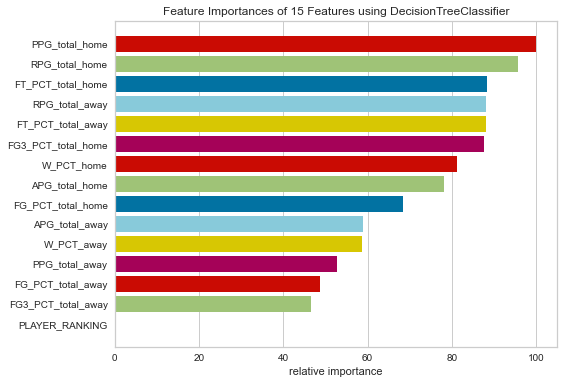

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70       585
         1.0       0.55      0.54      0.55       391

    accuracy                           0.64       976
   macro avg       0.63      0.62      0.62       976
weighted avg       0.64      0.64      0.64       976



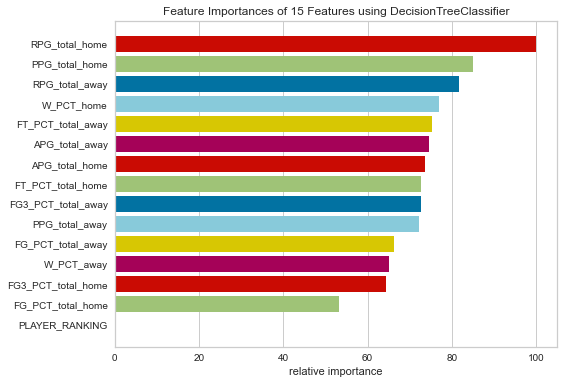

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       465
         1.0       0.55      0.52      0.54       367

    accuracy                           0.60       832
   macro avg       0.60      0.59      0.59       832
weighted avg       0.60      0.60      0.60       832



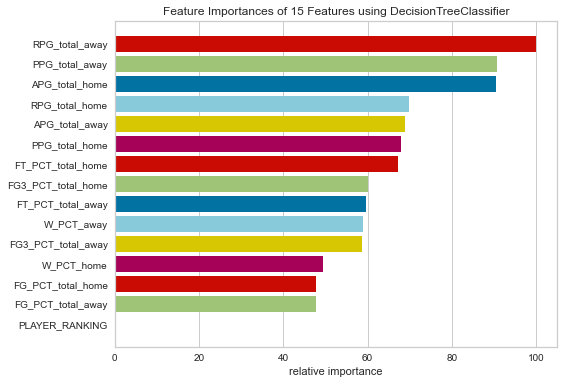

---------------------------------------------


In [31]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'class_weight': ['balanced', None],
        'criterion': ['gini', 'entropy'],
    },
)

## Try w/ diffrent random_state

WINNER:

Best decision tree accuracy ({'max_depth': 11, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

         0.0       0.65      0.91      0.76       849
         1.0       0.58      0.21      0.31       516

    accuracy                           0.64      1365
   macro avg       0.62      0.56      0.54      1365
weighted avg       0.63      0.64      0.59      1365



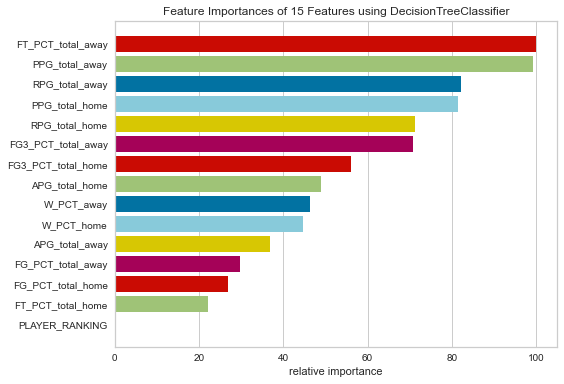

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_depth': 59, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       589
         1.0       0.57      0.52      0.55       402

    accuracy                           0.65       991
   macro avg       0.63      0.63      0.63       991
weighted avg       0.64      0.65      0.64       991



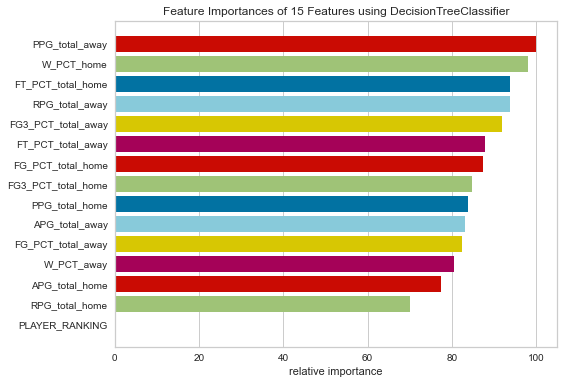

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_depth': 61, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.62      0.61      0.61       337
         1.0       0.55      0.56      0.55       287

    accuracy                           0.58       624
   macro avg       0.58      0.58      0.58       624
weighted avg       0.59      0.58      0.59       624



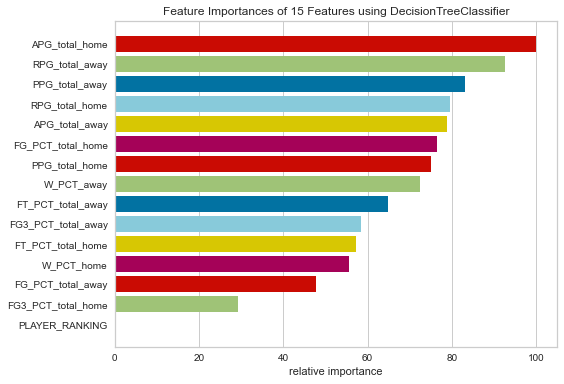

---------------------------------------------
FT:

Best decision tree accuracy ({'max_depth': 96, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58       325
         1.0       0.56      0.59      0.57       304

    accuracy                           0.58       629
   macro avg       0.58      0.58      0.58       629
weighted avg       0.58      0.58      0.58       629



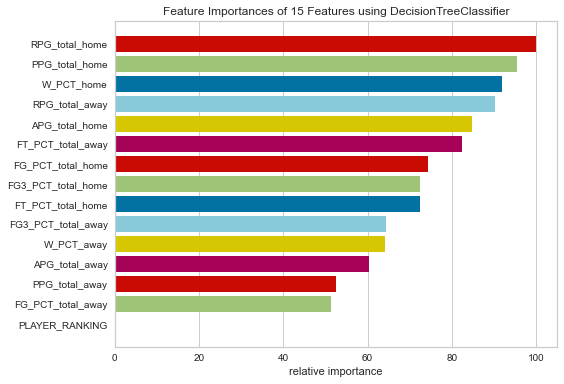

---------------------------------------------
AST:

Best decision tree accuracy ({'max_depth': 34, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       585
         1.0       0.53      0.53      0.53       391

    accuracy                           0.62       976
   macro avg       0.61      0.61      0.61       976
weighted avg       0.62      0.62      0.62       976



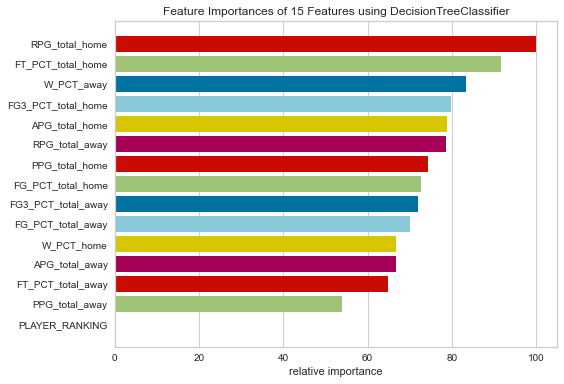

---------------------------------------------
REB:

Best decision tree accuracy ({'max_depth': 24, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65       465
         1.0       0.55      0.53      0.54       367

    accuracy                           0.60       832
   macro avg       0.60      0.60      0.60       832
weighted avg       0.60      0.60      0.60       832



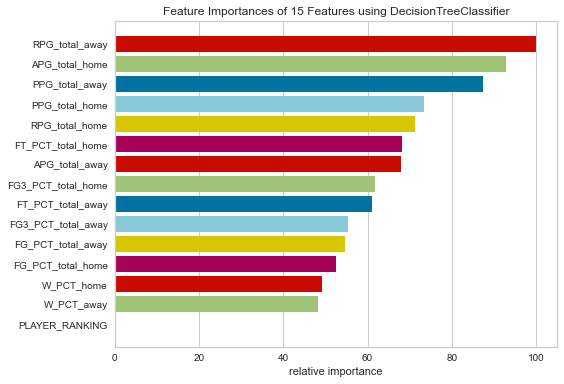

---------------------------------------------


In [32]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=1234),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,120)],
        'criterion': ['gini', 'entropy'],
    },
)

WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 352, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       849
         1.0       0.56      0.44      0.49       516

    accuracy                           0.66      1365
   macro avg       0.63      0.61      0.62      1365
weighted avg       0.65      0.66      0.65      1365



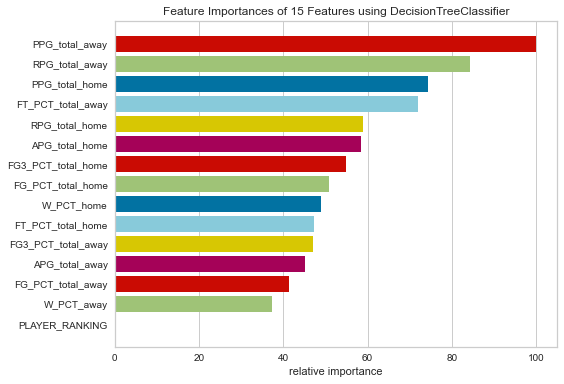

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 702, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       589
         1.0       0.57      0.51      0.54       402

    accuracy                           0.64       991
   macro avg       0.63      0.62      0.62       991
weighted avg       0.64      0.64      0.64       991



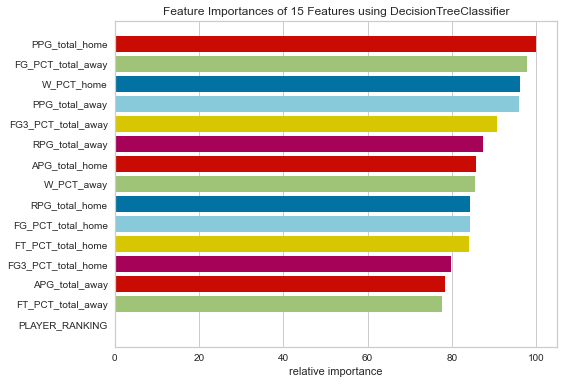

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 688, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61       337
         1.0       0.56      0.61      0.58       287

    accuracy                           0.60       624
   macro avg       0.60      0.60      0.60       624
weighted avg       0.60      0.60      0.60       624



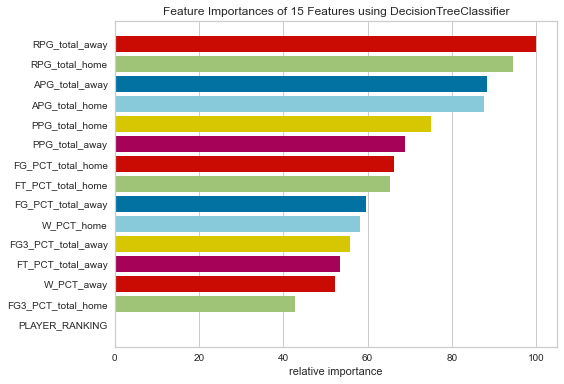

---------------------------------------------
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1858, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56       325
         1.0       0.54      0.56      0.55       304

    accuracy                           0.55       629
   macro avg       0.55      0.55      0.55       629
weighted avg       0.56      0.55      0.55       629



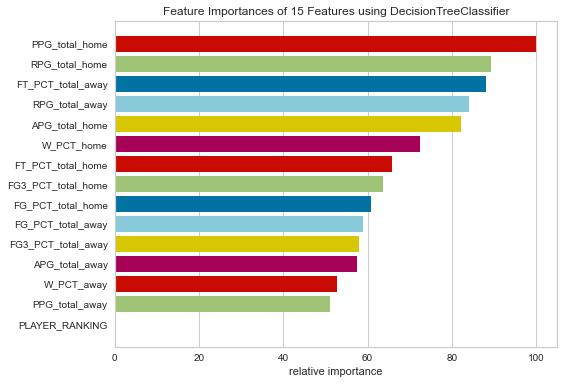

---------------------------------------------
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1454, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       585
         1.0       0.55      0.56      0.56       391

    accuracy                           0.64       976
   macro avg       0.63      0.63      0.63       976
weighted avg       0.64      0.64      0.64       976



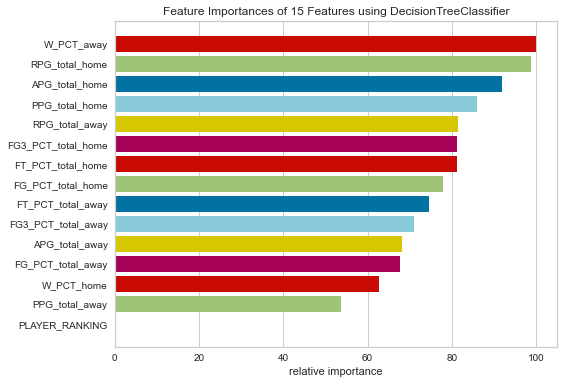

---------------------------------------------
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1930, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66       465
         1.0       0.56      0.54      0.55       367

    accuracy                           0.61       832
   macro avg       0.61      0.60      0.60       832
weighted avg       0.61      0.61      0.61       832



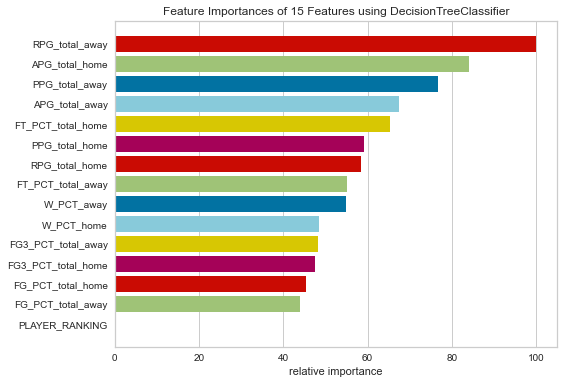

---------------------------------------------


In [33]:
print_all_metrics_and_plot(
    RandomForestClassifier(random_state=76634),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(4,2000,2)],
        'criterion': ['gini', 'entropy'],
    },
)